In [ ]:
%matplotlib inline

## Optical Match rotation only, no scaling
http://stackoverflow.com/questions/26574303/estimate-euclidean-transformation-with-python

In [11]:
from skimage import io, transform
import numpy as np
from matplotlib.pylab import *
from scipy.optimize import *

dst = np.array([[1.0,2.0],[1.0,4.0],[3.0,3.0],[3.0,7.0]])
src = np.array([[1.2,1.7],[1.1,3.8],[3.1,3.4],[2.6,7.0]])
T = transform.estimate_transform('similarity',src, dst)
print T

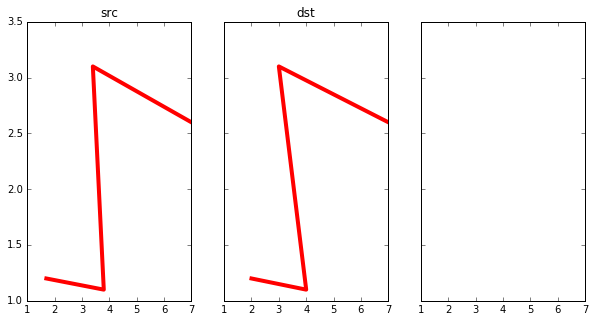

In [12]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(10, 5), sharex=True,
                                    sharey=True)
ax0.set_title('src')
ax1.set_title('dst')
ax0.plot(src[:, 1], src[:, 0], '-r', linewidth=4)
ax1.plot(dst[:, 1], src[:, 0], '-r', linewidth=4)

In [10]:


def obj_fun(pars,x,src):
    theta, tx, ty = pars
    H = array([[cos(theta), -sin(theta), tx],\
         [sin(theta), cos(theta), ty],
         [0,0,1]])
    src1 = c_[src,ones(src.shape[0])]
    return sum( (x - src1.dot(H.T)[:,:2])**2 )

def apply_transform(pars, src):
    theta, tx, ty = pars
    H = array([[cos(theta), -sin(theta), tx],\
         [sin(theta), cos(theta), ty],
         [0,0,1]])
    src1 = c_[src,ones(src.shape[0])]
    return src1.dot(H.T)[:,:2]

res = minimize(obj_fun,[0,0,0],args=(dst,src), method='Nelder-Mead')
print res

 final_simplex: (array([[-0.14666661, -0.55942995,  0.35993965],
       [-0.1466779 , -0.55949117,  0.35998586],
       [-0.14667076, -0.55942846,  0.35997133],
       [-0.14665231, -0.55937279,  0.35992499]]), array([ 0.12548207,  0.12548207,  0.12548207,  0.12548207]))
           fun: 0.12548207150436777
       message: 'Optimization terminated successfully.'
          nfev: 194
           nit: 106
        status: 0
       success: True
             x: array([-0.14666661, -0.55942995,  0.35993965])
